# LR线性回归学习

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


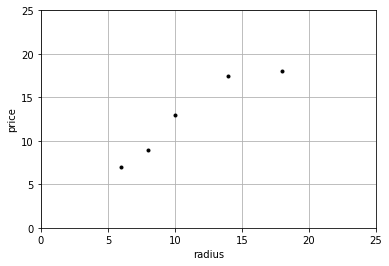

In [15]:
#数据可视化
x = [[6],[8],[10],[14],[18]]       ##正常情况下每个样本特征不止一维，所以每个样本都放在一个list里面
y = [7,9,13,17.5,18]
fig = plt.figure() #创建figure对象
fig.add_subplot(1,1,1)  #matplotlib会在最后一个用过的subplot上绘制  这两步在绘制单个图时可省略
plt.plot(x,y,'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.xlabel('radius')
plt.ylabel('price')

In [8]:
#sklearn建模
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
model.predict([[12],[25]])
print ('预测一张12英寸和25英寸的披萨价格为：$%.2f,$%.2f' %(model.predict([[12],[25]])[0],model.predict([[12],[25]])[1]))

预测一张12英寸和25英寸的披萨价格为：$13.68,$26.37


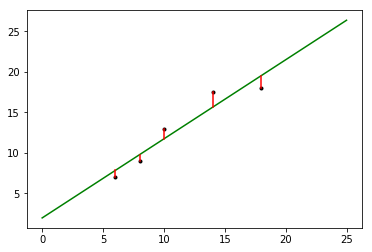

In [16]:
#绘制拟合的线性回归模型：y=ax+b
plt.plot(x,y,'k.')
x2 = [[0],[10],[14],[25]]
y2 = model.predict(x2)
plt.plot(x2,y2,'g-')

#残差预测值
yr = model.predict(x)  #对原始样本进行预测
for idx,xx in enumerate(x):
    plt.plot([xx,xx],[y[idx],yr[idx]],'r-')


In [27]:
#计算残差平方和
np.mean((y-yr)**2)

1.7495689655172406

In [39]:
#模型lR怎么计算参数a和b的
np.var(x,ddof=1)  ##ddof=1无偏估计校正系数，可得样本方差无偏估计量，其实是只除于（n-1）
print (np.cov([6,8,10,14,18],[7,9,13,17.5,18])) #计算x与y的协方差 [0][1]
a = np.cov([6,8,10,14,18],[7,9,13,17.5,18])[0][1]/np.var(x,ddof=1) #计算相关系数a
print ('a:',a)
b = np.mean(y)-a*np.mean(x)
print ('b:',b)

[[ 23.2   22.65]
 [ 22.65  24.3 ]]
a: 0.976293103448
b: 1.96551724138


@@@@@@@假设有另一组数据，作为测试集进行评估预测的效果，拟合程度用R方表示(0,1)之间

In [43]:
x_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
#LinearRegrassion 的score方法可以计算R方
#model.fit(x,y)
model.score(x_test,y_test)  #0.66表示测试集里超过半数可以通过模型解释

0.6620052929422553

# 多元线性回归

In [50]:
x = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

x_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x_test)
for i,prediction in enumerate(predictions):
    print('Predicted:%s,Target:%s' %(prediction,y_test[i]))  ##%.2f不行，因为结果是一个list不是一个实数
print('R-squared:%.2f' %model.score(x_test,y_test))

Predicted:[ 10.0625],Target:[11]
Predicted:[ 10.28125],Target:[8.5]
Predicted:[ 13.09375],Target:[15]
Predicted:[ 18.14583333],Target:[18]
Predicted:[ 13.3125],Target:[11]
R-squared:0.77


# 非线性：多项式回归（一元为例）PolynomialFeatures

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

x_train_quadratic:
 [[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
x_test_quadratic:
 [[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
一元线性回归r-squared: 0.809726797708
二元回归r-squared: 0.867544365635


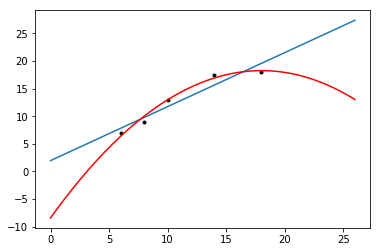

In [86]:
#一次
regressor = LinearRegression()
regressor.fit(x_train,y_train)
plt.plot(x_train, y_train, 'k.')
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

#二次
quadratic_featurizer = PolynomialFeatures(degree=2) ##只需要改动这里即可实现多元回归
x_train_quadratic = quadratic_featurizer.fit_transform(x_train)
x_test_quadratic = quadratic_featurizer.fit_transform(x_test)
print('x_train_quadratic:\n',x_train_quadratic)
print('x_test_quadratic:\n',x_test_quadratic)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(x_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(len(xx),1)) #reshape(a,b) 二维数组】
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),'r-')
print('一元线性回归r-squared:',regressor.score(x_test,y_test))
print('二元回归r-squared:',regressor_quadratic.score(x_test_quadratic,y_test))

# 正则化防止过拟合（用最简单的模型解释数据）

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 线性回归应用案例：红酒质量

In [97]:
import pandas as pd
df = pd.read_csv('./winequality/winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


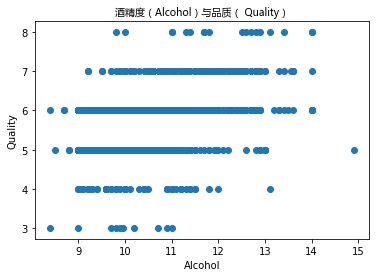

In [104]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)  #有了这两行标题就可以显示中文了

plt.scatter(df['alcohol'],df['quality']) #散点图
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('酒精度（Alcohol）与品质（ Quality）',fontproperties=font)
#由图可以看出酒精度和品质有比较弱的正相关特性，左下-右上趋势

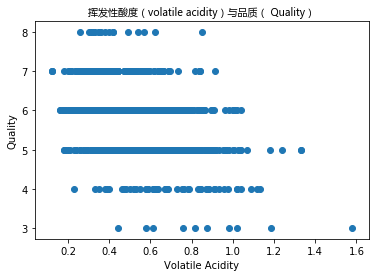

In [105]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('挥发性酸度（volatile acidity）与品质（ Quality）',fontproperties=font)
#挥发性酸度（volatile acidity）与品质呈现负相关特性

接下来：把数据分成训练集和测试集，拟合与评估模型

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [115]:
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
#通过train_test_split把数据集分成训练集和测试集。
#两个分区的数据比例都可以通过参数设置。默认情况下，25%的数据被分配给测试集
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:',regressor.score(X_test,y_test))

R-squared: 0.370747688547


接下来：R方值0.38表明38%的测试集数据都通过了测试。如果剩下的72%的数据被分到训练集，那效果就不一样了。我们可以用交叉检验的方法来实现一个更完善的效果评估

In [118]:
from sklearn.cross_validation import cross_val_score
regressor = LinearRegression()
scores = cross_val_score(regressor,X,y,cv=5) #cv参数将数据集分成了5份。每个分区都会轮流作为测试集使用 ，score的值即为R方值
#对train和test dataset进行分折，之后可用于线上测试集
print(scores,scores.mean())

[ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ] 0.290041628842


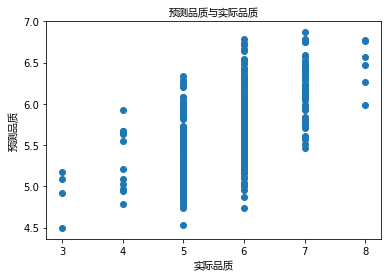

In [122]:
#模型预测的品质与实际的品质的图像显示结果
plt.scatter(y_test,y_predictions)
plt.xlabel('实际品质',fontproperties=font)
plt.ylabel('预测品质',fontproperties=font)
plt.title('预测品质与实际品质',fontproperties=font)
#和假设一致，预测品质很少和实际品质完全一致。由于绝大多数训练数据都是一般品质的酒，所以这个模型更适合预测一般质量的酒。

# 梯度下降法拟合模型（随机梯度下降SGD,批量梯度下降BGD）波士顿住房数据(13个解释变量)
#默认成本函数为残差平方和

In [123]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor  ###此处不再是LinearRegressor了
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

data = load_boston()
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target)

In [137]:
(data.data).shape
len(data.target)

506

In [146]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

In [145]:
#交叉验证法完成训练和测试
regressor = SGDRegressor(loss='squared_loss') #损失函数为
scores = cross_val_score(regressor,X_train,y_train,cv=5)  #线下验证，只对train dataset进行分折，再用test进行测试
print('交叉验证R方值：%s\n交叉验证R方均值：%.2f' %(scores,scores.mean()))
regressor.fit_transform(X_train,y_train)
print('测试集R方值：',regressor.score(X_test,y_test))

交叉验证R方值：[ 0.64944109  0.74302182  0.47823559  0.68742083  0.80084883]
交叉验证R方均值：0.67
测试集R方值： 0.746392398431


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


# END

In [112]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.30
84,6.3,0.300,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.30
757,8.1,0.870,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.80
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95
249,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.90
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.00
384,7.7,0.510,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.20
1206,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.00
129,6.1,0.380,0.15,1.8,0.072,6.0,19.0,0.99550,3.42,0.57,9.40
898,8.3,0.310,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.50


In [87]:
xx = np.linspace(0, 26, 100)
xx
xx.reshape(len(xx),1)

array([[  0.        ],
       [  0.26262626],
       [  0.52525253],
       [  0.78787879],
       [  1.05050505],
       [  1.31313131],
       [  1.57575758],
       [  1.83838384],
       [  2.1010101 ],
       [  2.36363636],
       [  2.62626263],
       [  2.88888889],
       [  3.15151515],
       [  3.41414141],
       [  3.67676768],
       [  3.93939394],
       [  4.2020202 ],
       [  4.46464646],
       [  4.72727273],
       [  4.98989899],
       [  5.25252525],
       [  5.51515152],
       [  5.77777778],
       [  6.04040404],
       [  6.3030303 ],
       [  6.56565657],
       [  6.82828283],
       [  7.09090909],
       [  7.35353535],
       [  7.61616162],
       [  7.87878788],
       [  8.14141414],
       [  8.4040404 ],
       [  8.66666667],
       [  8.92929293],
       [  9.19191919],
       [  9.45454545],
       [  9.71717172],
       [  9.97979798],
       [ 10.24242424],
       [ 10.50505051],
       [ 10.76767677],
       [ 11.03030303],
       [ 11

In [71]:
x_train = [[6], [8], [10], [14], [18]]
x_train

[[6], [8], [10], [14], [18]]

In [18]:
for idx,xx in enumerate(x):
    print (idx)
    print (xx)

0
[6]
1
[8]
2
[10]
3
[14]
4
[18]


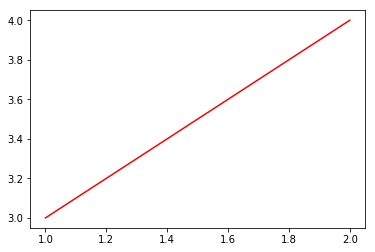

In [23]:
plt.plot([1,2],[3,4],'r-')